In [76]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [77]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [78]:
# 把兩個訓練資料集和測試資料集讀進來
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [79]:
set(train.columns)-set(test.columns)

{'Survived'}

In [80]:
#有，訓練資料沒有”Survived“欄位

## Q2: 測試資料集是否有遺失值?

In [81]:
print(train.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [82]:
#各欄位間的缺失值個數

for i in ['Age','Cabin','Embarked']:
    print(i)
    print(train[i].isnull().sum())

Age
177
Cabin
687
Embarked
2


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

With bfill, mean = 29.87 | std = 14.60
With ffill, mean = 29.58 | std = 14.55


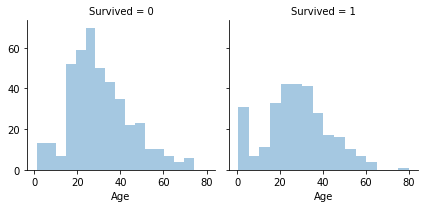

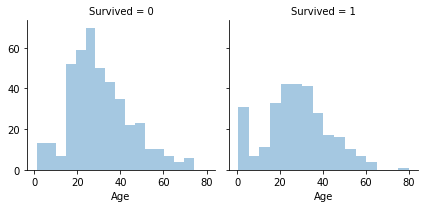

In [124]:
for i in ['bfill','ffill']:
    x = train['Age'].fillna(method=i)
    m = x.mean()
    s = x.std()
    print('With %s, mean = %.2f | std = %.2f'%(i, m, s))
    g = sns.FacetGrid(train, col='Survived')
    g.map(sns.distplot, 'Age', kde=False)    

In [ ]:
#使用bfill的方式來填補缺失值，相較於使用ffill的Age平均值會較高
#在standard deviation上，兩者差異僅有0.05，較不顯著